## 딥러닝_케라스(Keras) 훑어보기
[07-08 케라스(Keras) 훑어보기](https://wikidocs.net/32105)
- 케라스: 딥러닝을 쉽게할 수 있는 파이썬 라이브러리

### 1. 전처리
- Tokenizer(): 토큰화와 정수 인코딩 수행
- 아래 결과에서 **'great'** 는 단어 집합(vocabulary)에 없으므로 출력되지 않음.

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


- pad_sequences(): 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 동일하게 맞춰줌. 정해준 길이보다 긴 샘플은 자르고, 짧은 샘플은 값을 0으로 채움.
    - **'post'** : 뒤에 0을 채움.

In [12]:
pad_sequences([[1,2,3], [3,4,5,6], [7,8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

### 2. 워드 임베딩
- 텍스트 내의 단어들을 밀집 벡터로 만듦
- 원-핫 벡터는 대부분이 0이고, 단 하나의 1값을 갖는 벡터(벡터의 차원이 상대적으로 큼)이지만, 워드 임베딩으로 얻은 임베딩 벡터는 모든 원소 값이 실수임(또한 상대적으로 저차원임).
- Embedding(): 단어를 밀집 벡터로 만듦. 인공 신경망 용어로는 임베딩 층을 만듦. 정수 인코딩이 된 단어들을 입력으로 받아서 임베딩을 수행함. 2D 정수 텐더를 입력으로 받는데, 이때 각 sample은 정수 인코딩이된 결과(정수의 시퀀스)임. 출력 결과는 3D임.
    - 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
    - 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
    - input_length = 입력 시퀀스의 길이

In [16]:
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 됨
from keras.layers import Embedding
vocab_size=7
embedding_dim=2
Embedding(vocab_size, embedding_dim, input_length=5)

### 3. 모델링
- Sequential() : 인공 신경망 챕터에서 입력층, 은닉층, 출력층에 대해서 배웠는데, 케라스에서는 이러한 층을 구성하기 위해 Sequential()을 사용함. Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가함.
- 예시
    - model = Sequential()
    - model.add(Embedding(vocab_size, output_dim, input_length))
- Dense() 대표 인자
    - 첫번째 인자 = 출력 뉴런의 수.
    - input_dim = 입력 뉴런의 수. (입력의 차원)
    - activation = 활성화 함수.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu')) # 전결합층(fully-connected layer) 추가
model.add(Dense(1, activation='sigmoid')) # 출력층
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


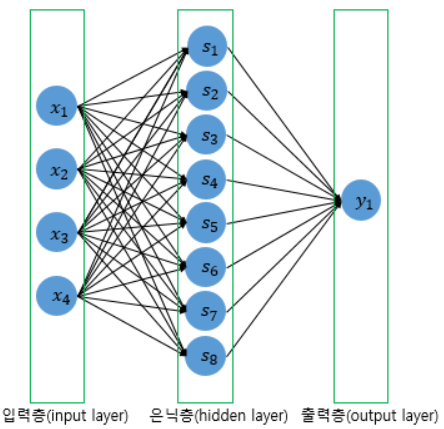

### 4. 컴파일(Compile)과 훈련(Training)
- compile() : 모델을 기계가 이해할 수 있도록 컴파일함. 손실 함수와 옵티마이저, 메트릭 함수를 선택함.